In [91]:
import pandas as pd
import matplotlib.pyplot as plt
# from NewsSentiment import TargetSentimentClassifier
from scipy.signal import savgol_filter


In [92]:
# tsc = TargetSentimentClassifier()
# tsc.infer_from_text("i hate trump", "trump")

In [99]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment.csv')
fox = pd.read_csv('netanyahu_fox_news_sentiment.csv')


In [94]:
def add_label(row):
    labels = {row['neg_s']: 'Negative', row['pos_s']:'Positive', row['neu_s']:'Neutral'}
    max_val = max(labels.keys())
    row['label'] = labels[max_val]
    row[labels[max_val]] = 1
    labels.pop(max_val)
    for key in labels.keys():
        row[labels[key]] = 0
    return row

cnn = cnn.apply(add_label, axis=1)
fox = fox.apply(add_label, axis=1)

    
    

In [95]:
cnn

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title
0,1,0,0,0,-0.563375,2023-02-26,0.0,Negative,0,0.734499,0,0.174872,0,0.090629,"About 160,000 people protest against Netanyahu..."
1,0,0,1,0,0.998594,2023-02-22,1.0,Positive,0,0.056914,0,0.194281,0,0.748805,11 Palestinians killed during Israeli raid tar...
2,0,1,0,0,0.597924,2023-02-23,2.0,Neutral,0,0.007922,0,0.694093,0,0.297985,Your flight from Israel might be about to get ...
3,0,0,1,0,0.768286,2023-02-23,3.0,Positive,0,0.045981,0,0.449278,0,0.504741,Israel launches airstrikes on Gaza after rocke...
4,1,0,0,0,-0.231305,2023-02-21,4.0,Negative,0,0.395117,0,0.386767,0,0.218116,Opinion: Netanyahu's 'reforms' are threatening...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,-0.028670,2021-12-10,95.0,Neutral,0,0.029244,0,0.955209,0,0.015547,A single sentence that perfectly captures the ...
96,1,0,0,0,-0.782522,2021-11-08,96.0,Negative,0,0.785085,0,0.136233,0,0.078682,Don't count on an end to the Joe Biden-Naftali...
97,1,0,0,0,-1.000000,2021-11-07,97.0,Negative,0,0.982651,0,0.011821,0,0.005528,"Israel doubles down against US, saying there i..."
98,0,1,0,0,0.491891,2021-10-12,98.0,Neutral,0,0.077443,0,0.579635,0,0.342922,Trump's inner circle takes a trip down memory ...


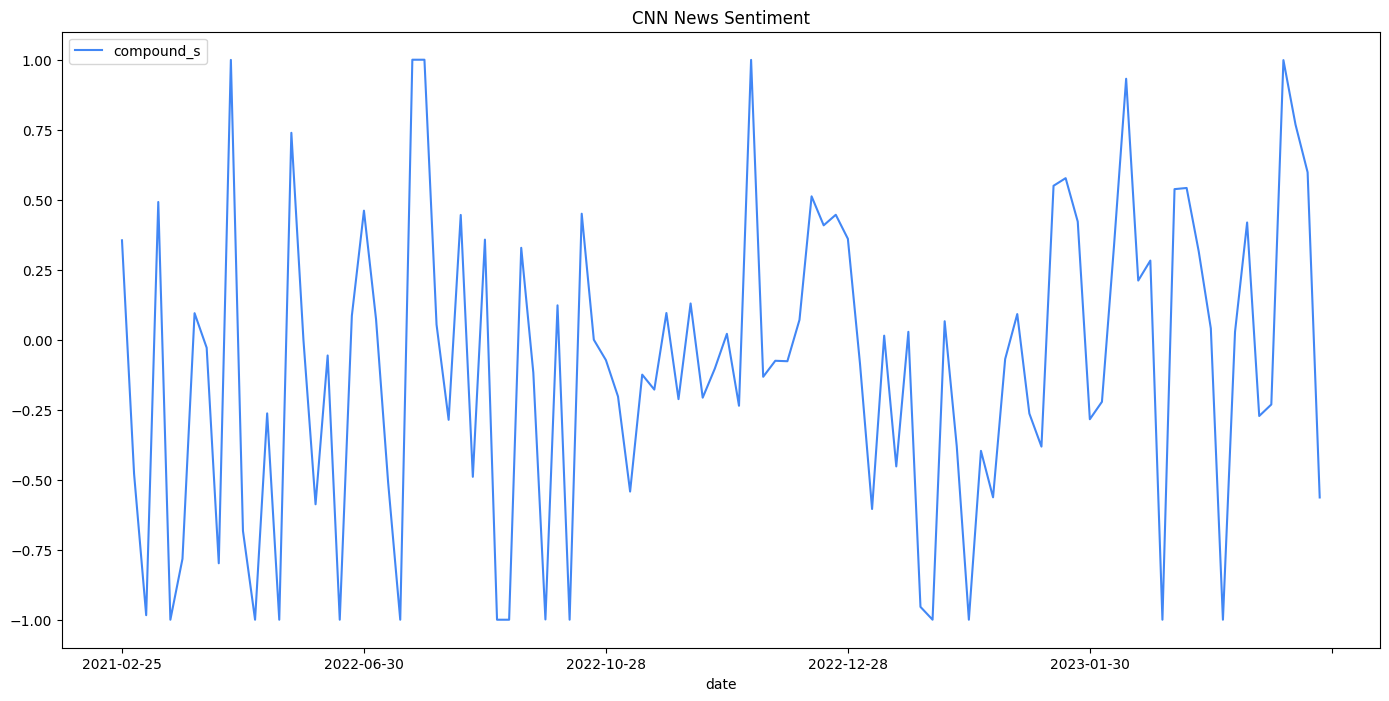

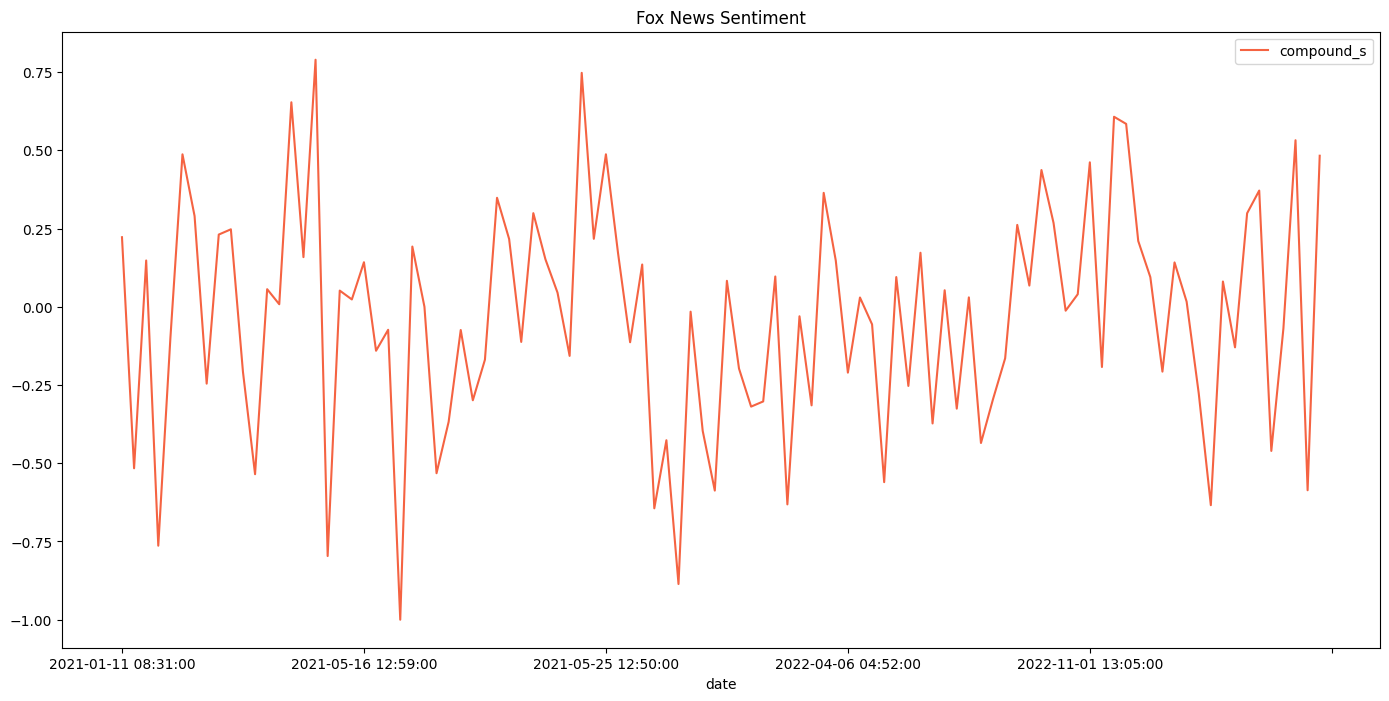

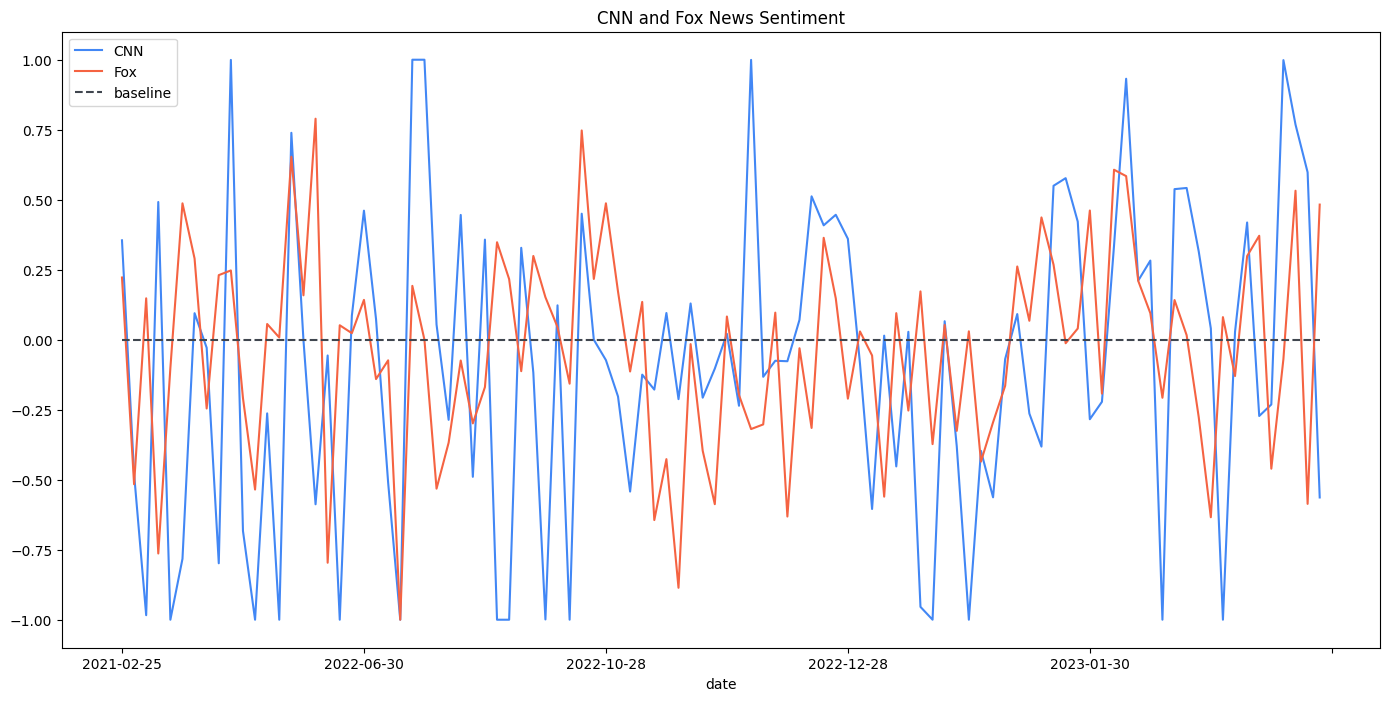

In [117]:
def plot(df:pd.DataFrame, vendor, color='#4287f5'):
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8), color=color)


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2, color1='#4287f5', color2='#f56342'):    
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color1 , figsize=(17,8))
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color=color2)
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox', color='#f56342')
joined_plot(cnn, fox, 'CNN', 'Fox')

/tmp/ipykernel_1478/1023225465.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
/tmp/ipykernel_1478/1023225465.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))
/tmp/ipykernel_1478/1023225465.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
/tmp/ipykernel_1478/1023225465.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median i

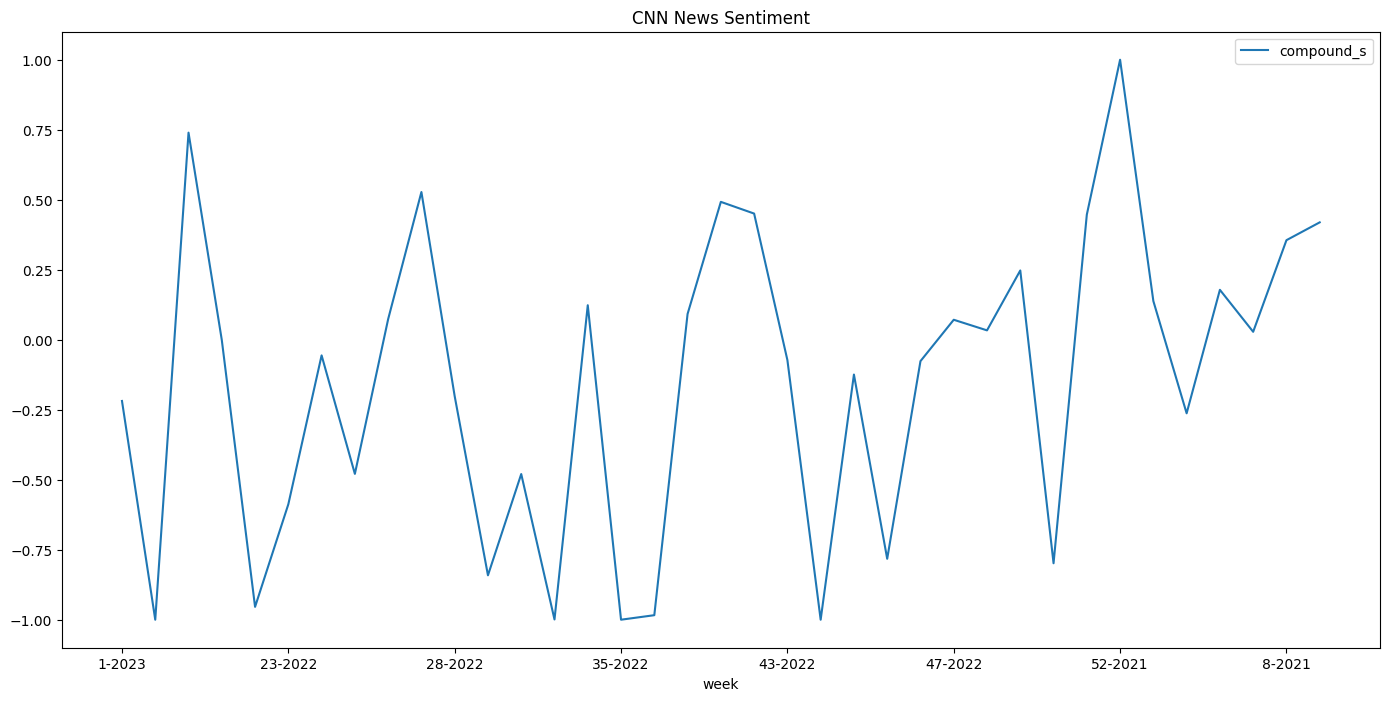

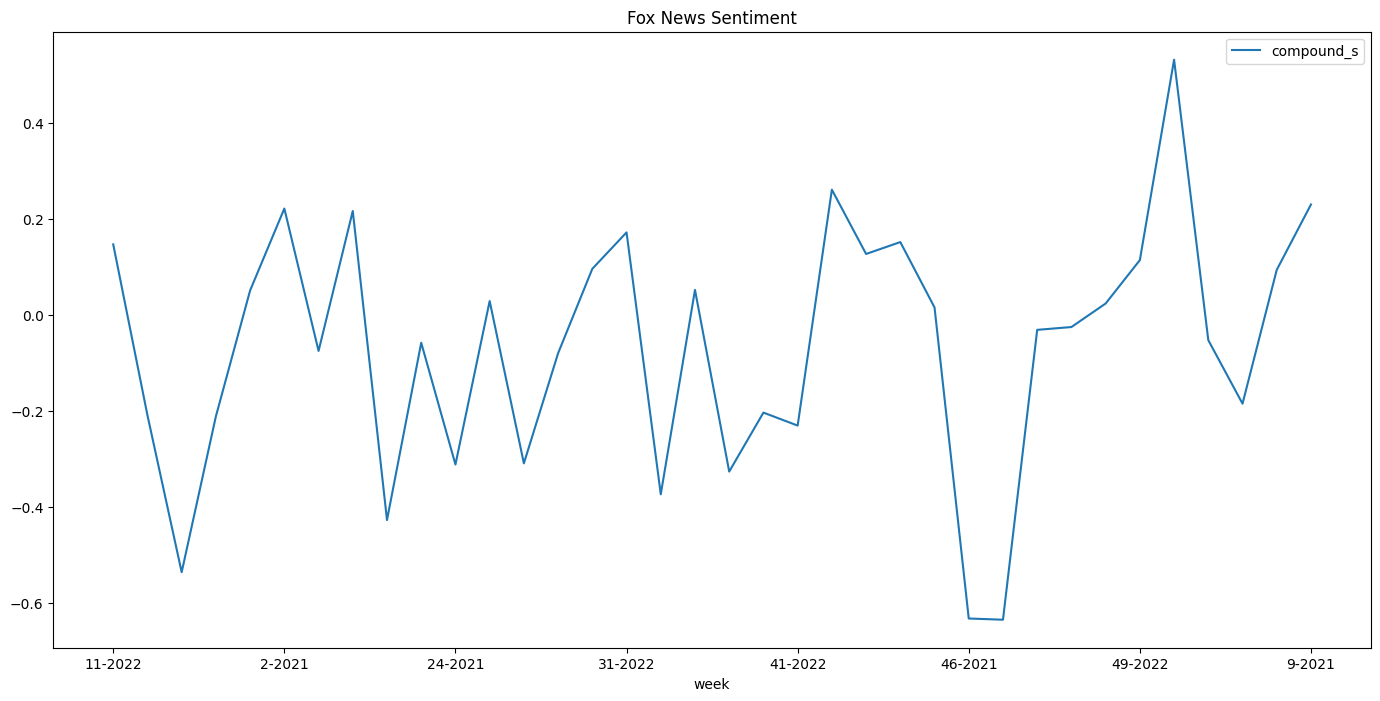

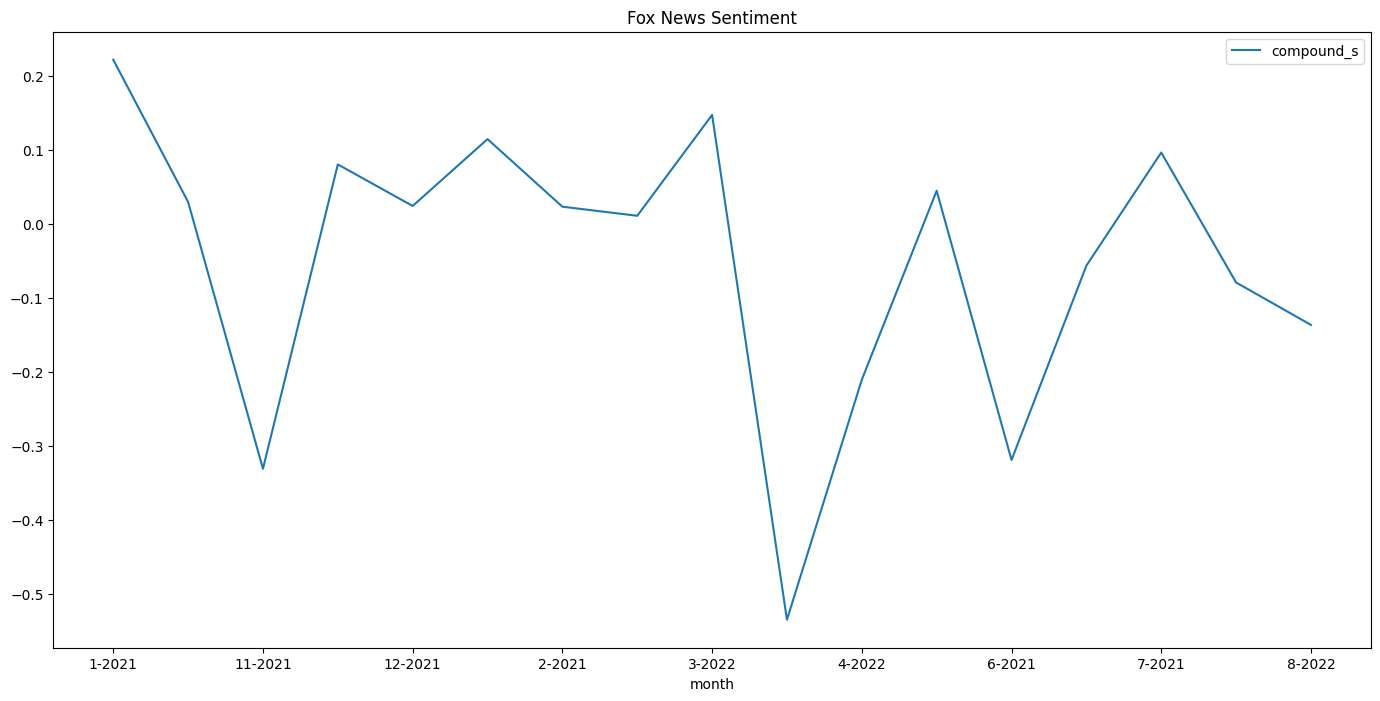

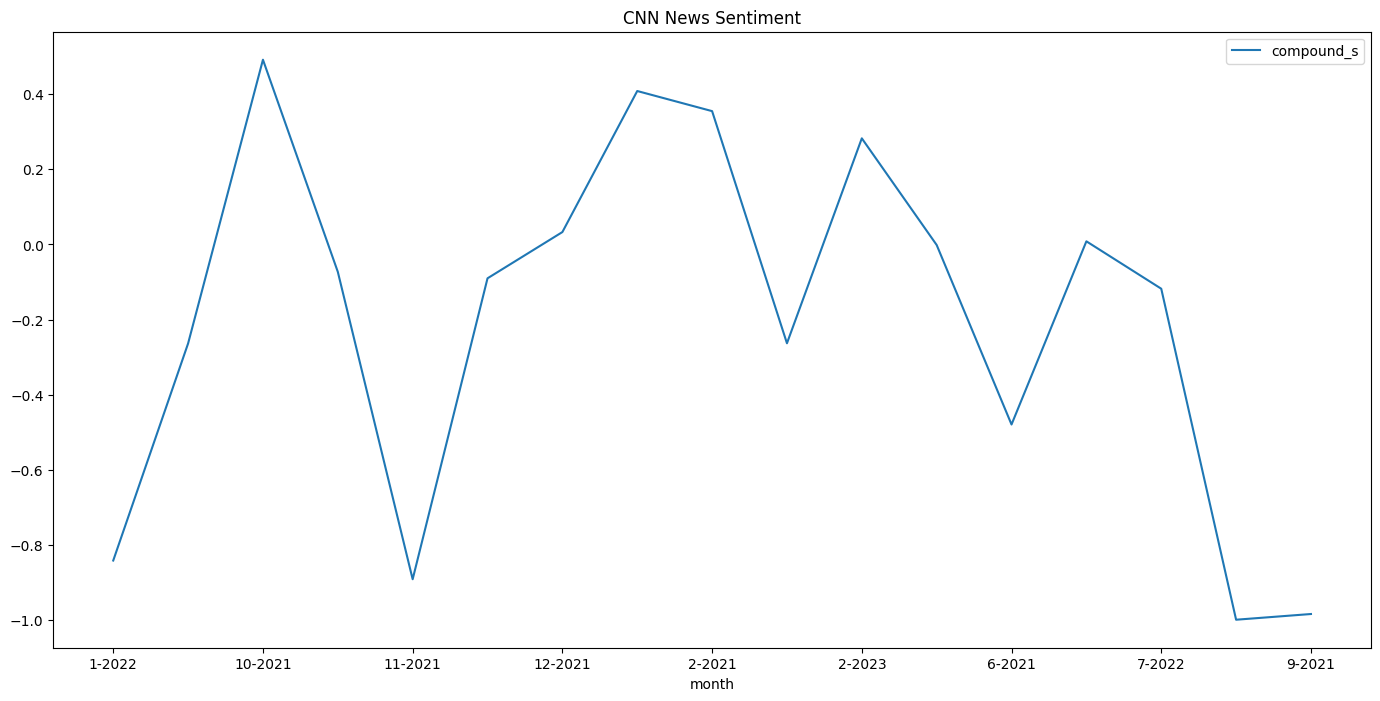

In [97]:
def weekly_avg_plot(df:pd.DataFrame, vendor):
    
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
    df = df.sort_values(by=['week'], ascending=False)
    df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

def monthly_avg_plot(df:pd.DataFrame, vendor):
        
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.month.astype(str) + '-' + df['date'].dt.year.astype(str)
        df = df.sort_values(by=['month'], ascending=False)
        df.groupby('month').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox')
monthly_avg_plot(fox, 'Fox')
monthly_avg_plot(cnn, 'CNN')

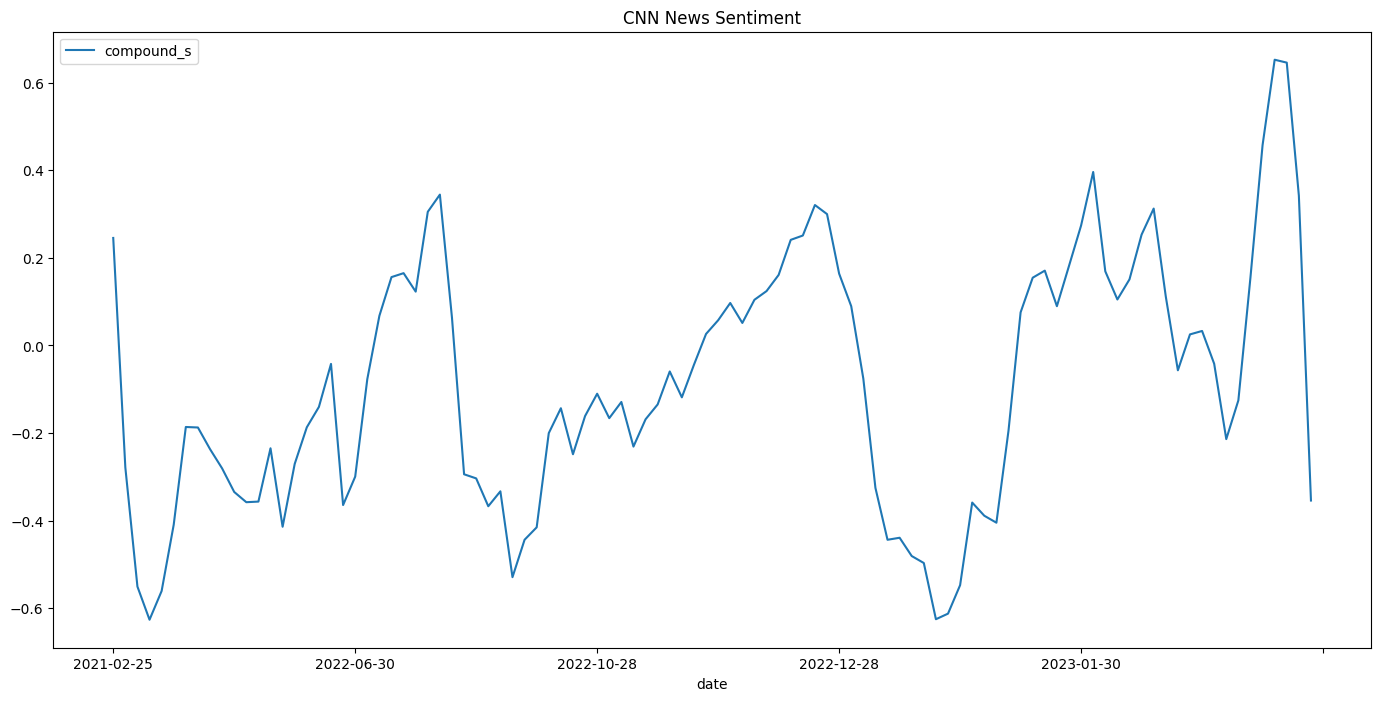

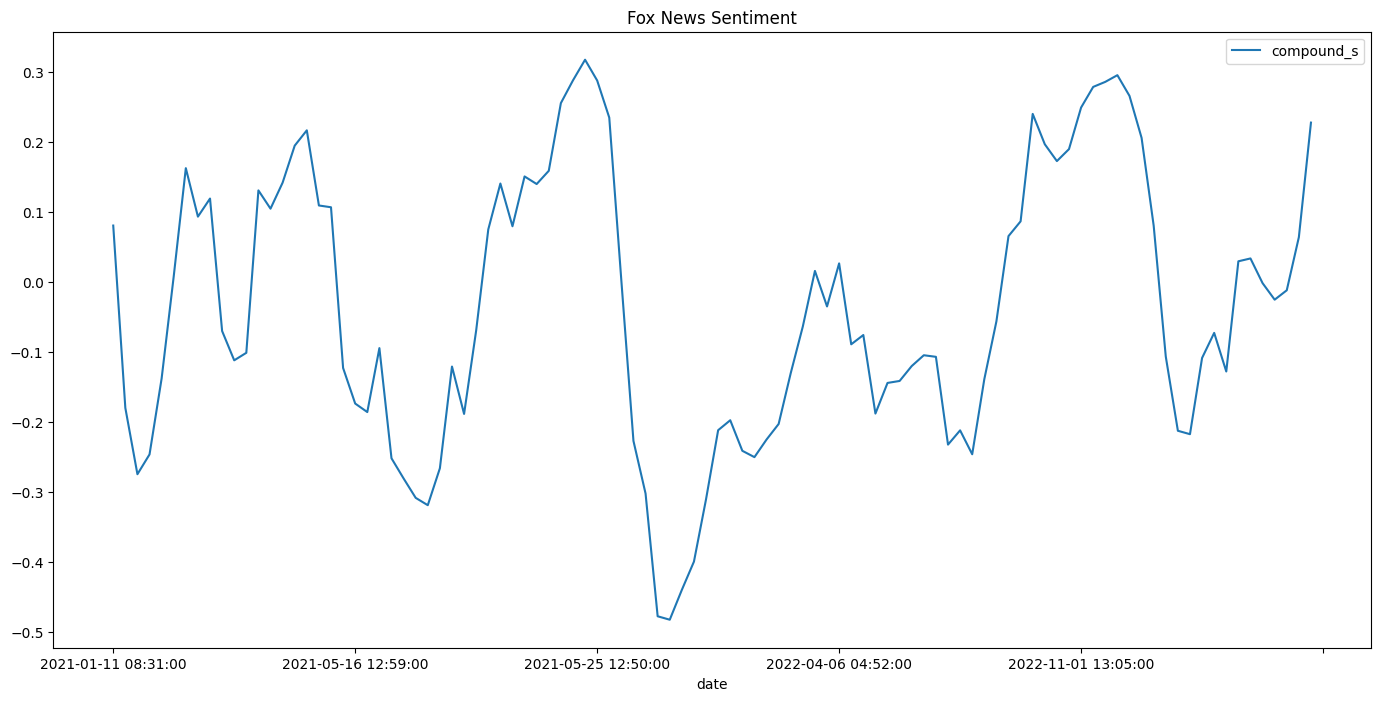

In [102]:
def plot_smooth(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    df['compound_s'] = savgol_filter(df['compound_s'], 11, 3)
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_smooth(cnn, 'CNN')
plot_smooth(fox, 'Fox')

In [118]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment_lbl.csv')

,title,date,pos,neg,neu,index
0,"About 160,000 people protest against Netanyahu...",2023-02-26,0,1,0,0.0
1,11 Palestinians killed during Israeli raid tar...,2023-02-22,0,0,1,1.0
2,Your flight from Israel might be about to get ...,2023-02-23,0,0,1,2.0
3,Israel launches airstrikes on Gaza after rocke...,2023-02-23,0,0,1,3.0
4,Opinion: Netanyahu's 'reforms' are threatening...,2023-02-21,0,0,1,4.0
...,...,...,...,...,...,...
95,A single sentence that perfectly captures the ...,2021-12-10,0,0,1,95.0
96,Don't count on an end to the Joe Biden-Naftali...,2021-11-08,0,1,0,96.0
97,"Israel doubles down against US, saying there i...",2021-11-07,0,1,0,97.0
98,Trump's inner circle takes a trip down memory ...,2021-10-12,0,0,1,98.0


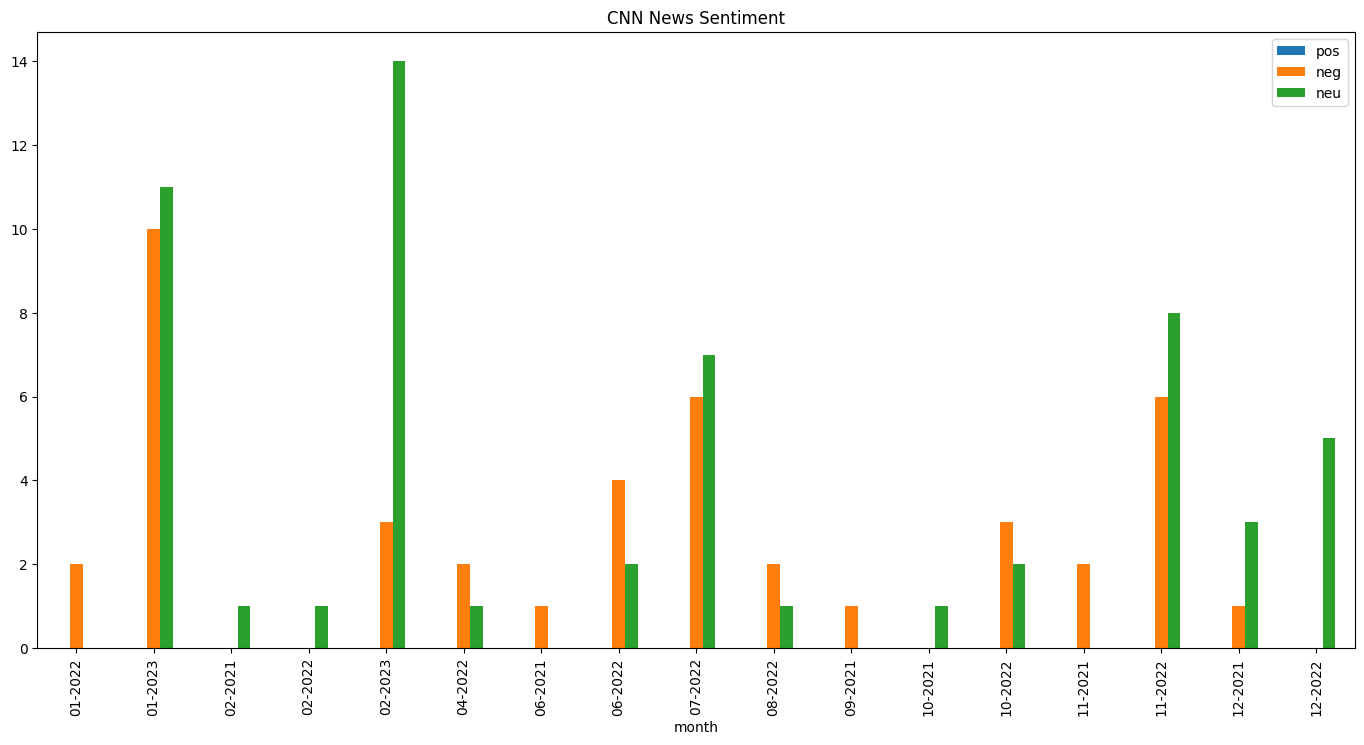

In [126]:
def add_month(row):
    row['month'] = row['date'].split('-')[0] + '-' + row['date'].split('-')[1]
    return row

# cnn = cnn.apply(add_month, axis=1)

def plot_counts(df:pd.DataFrame, vendor):

    df = df.apply(add_month, axis=1)
    df = df.sort_values(by=['month'])
    df.groupby('month').agg({'pos':'sum', 'neg':'sum', 'neu':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
# cnn

In [71]:
fox[cnn.month == '2021-12']

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title,month
92,0.0,1,0.0,0,0.298789,2022-12-06 18:11:00,92.0,Neutral,0,0.162738,0,0.481707,0,0.355554,Larry Kudlow: Former Israel Prime Minister Ben...,2022-12
93,0.0,1,0.0,0,0.482590,2022-12-21 20:34:00,93.0,Neutral,0,0.117818,0,0.497002,0,0.385180,Incoming Israeli Prime Minister Netanyahu says...,2022-12
94,0.0,1,0.0,0,0.080647,2022-11-30 12:00:00,94.0,Neutral,0,0.179170,0,0.634679,0,0.186151,Netanyahu: Iran nuclear deal is 'probably dead...,2022-11
95,0.0,1,0.0,0,-0.129687,2022-12-04 15:14:00,95.0,Neutral,0,0.299839,0,0.526410,0,0.173750,Netanyahu insists he won't step on 'landmine' ...,2022-12
